In [0]:
import pandas as pd
import numpy as np
import pickle
import time
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc
import zipfile
import io
from google.colab import files

In [0]:
import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold,train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
uploaded = files.upload()

Saving train_round5.csv.zip to train_round5.csv.zip


In [0]:
! unzip train_round5.csv.zip

Archive:  train_round5.csv.zip
replace train_round5.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_round5.csv        


In [0]:
train = pd.read_csv('train_round5.csv')

In [0]:
train.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,check_in,check_out,adult_count,child_count,room_count,destination_id,destination_type_id,is_booking,similar_events,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_duration,plan_time,solo_travel,short_trip,weekend_trip,booking_rate,price_compare,biz_trip
0,0,2014-07-16 09:42:23,2,3,66,189,10067,2014.665587,501,0,0,2,2014-08-01 00:00:00,2014-08-02 00:00:00,2,0,1,8267,1,0,2,2,50,675,41,1.0,15.0,0,1,1,0.0,1,0
1,1,2014-07-16 09:45:48,2,3,66,189,10067,2014.665587,501,0,1,2,2014-08-01 00:00:00,2014-08-02 00:00:00,2,0,1,8267,1,0,1,2,50,675,41,1.0,15.0,0,1,1,0.0,1,0
2,2,2014-07-16 09:55:24,2,3,66,189,10067,2014.665587,501,0,0,2,2014-08-01 00:00:00,2014-08-02 00:00:00,2,0,1,8267,1,0,1,2,50,675,70,1.0,15.0,0,1,1,0.0,1,0
3,3,2014-07-16 10:00:06,2,3,66,189,10067,2014.665587,501,0,0,2,2014-08-01 00:00:00,2014-08-02 00:00:00,2,0,1,8267,1,0,1,2,50,675,98,1.0,15.0,0,1,1,0.0,1,0
4,4,2014-11-22 20:55:38,30,4,195,991,47725,2014.665587,1048,1,0,9,2015-06-26 00:00:00,2015-06-28 00:00:00,2,0,1,8803,1,0,1,3,151,1197,5,2.0,215.0,0,1,1,0.0,1,0


In [0]:
train.drop(columns=['Unnamed: 0','date_time','check_in','check_out'], inplace=True)

In [0]:
#drop according to feature importance 
train.drop(columns=['is_booking','short_trip','room_count','solo_travel','is_mobile','weekend_trip','posa_continent','similar_events',\
                    'is_package','adult_count','child_count','channel','user_location_country','price_compare','biz_trip'], inplace=True)

In [0]:
train.columns

Index(['site_name', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'destination_id',
       'destination_type_id', 'hotel_continent', 'hotel_country',
       'hotel_market', 'hotel_cluster', 'stay_duration', 'plan_time',
       'booking_rate'],
      dtype='object')

#### Train, test, split

In [0]:
train['hotel_cluster'].value_counts()

91    55752
41    41797
48    39948
64    39625
5     32914
65    32783
98    32017
59    30602
70    30269
42    29740
Name: hotel_cluster, dtype: int64

In [0]:
train['hotel_cluster'].replace([91, 41, 48, 64, 5, 65, 98, 59, 70, 42], \
                               ['ninety-one','forty-one','forty-eight','sixty-four', 'five',\
                               'sixty-five','ninety-eight','fifty-nine','seventy','forty-two'], inplace=True)
train['hotel_cluster'].value_counts()

ninety-one      55752
forty-one       41797
forty-eight     39948
sixty-four      39625
five            32914
sixty-five      32783
ninety-eight    32017
fifty-nine      30602
seventy         30269
forty-two       29740
Name: hotel_cluster, dtype: int64

In [0]:
X = train.drop(['hotel_cluster'], axis=1)
y = train['hotel_cluster']

In [0]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_y)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [0]:
# scales data between 0 and 1
X_train = keras.utils.normalize(X_train, axis=1)  
X_val = keras.utils.normalize(X_val, axis=1)

In [0]:
X_train.shape

(292357, 13)

### KERAS
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=13))
model.add(Dropout(0.25))
model.add(Dense(256 , activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256 , activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=50)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
history = model.fit(X_train, y_train,  epochs=500, batch_size=128, validation_data=(X_val,y_val), callbacks=[es])  #

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 292357 samples, validate on 73090 samples
Epoch 1/500
292357/292357 [==============================] - 22s 74us/step - loss: 2.2452 - acc: 0.1744 - val_loss: 2.1865 - val_acc: 0.1960
Epoch 2/500
292357/292357 [==============================] - 20s 69us/step - loss: 2.1902 - acc: 0.2055 - val_loss: 2.1712 - val_acc: 0.2107
Epoch 3/500
292357/292357 [==============================] - 21s 70us/step - loss: 2.1791 - acc: 0.2119 - val_loss: 2.1593 - val_acc: 0.2253
Epoch 4/500
292357/292357 [==============================] - 20s 69us/step - loss: 2.1698 - acc: 0.2151 - val_loss: 2.1433 - val_acc: 0.2282
Epoch 5/500
292357/292357 [==============================] - 20s 69us/step - loss: 2.1603 - acc: 0.2168 - val_loss: 2.1269 - val_acc: 0.2281
Epoch 6/500
292357/292357 [==============================] - 20s 69us/step - loss: 2.1424 - acc: 0.2221 - val_loss: 2.0742 - val_acc: 0.2534
Epoch 7/5

In [0]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_val, y_val, verbose=1)

73090/73090 [==============================] - 4s 57us/step


In [0]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


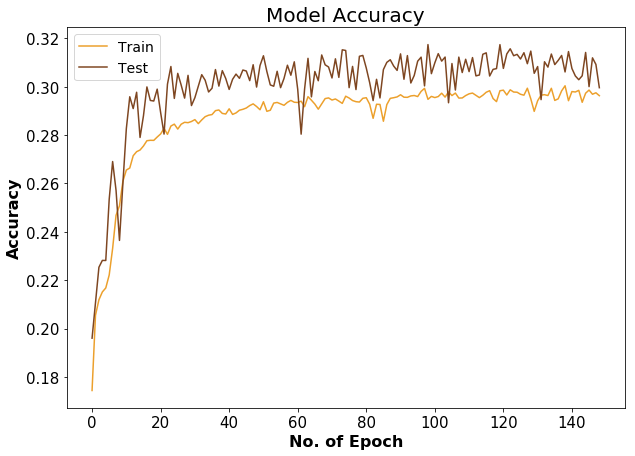

In [0]:
# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'], color='#eca02c')
plt.plot(history.history['val_acc'], color='#7e4621')

plt.title('Model Accuracy', fontsize=20)

plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.yticks(fontsize=15)

plt.xlabel('No. of Epoch', fontsize=16, weight='bold')
plt.xticks(fontsize=15)

plt.legend(['Train', 'Test'], loc='upper left', fontsize=14)

plt.savefig('keras_accuracy.jpg', transparent=True);
plt.show()

In [0]:
files.download('keras_accuracy.jpg')

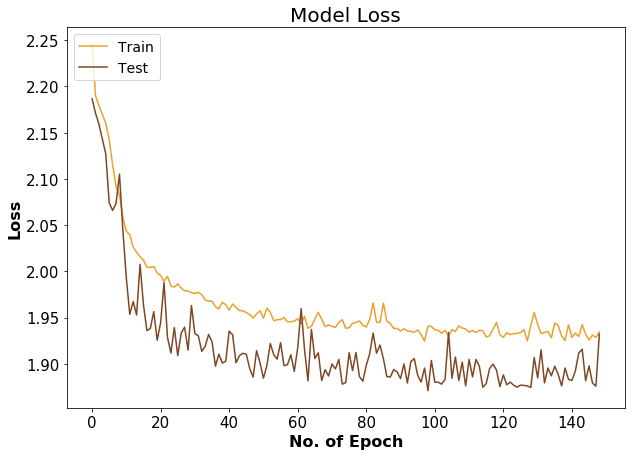

In [0]:
# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], color='#eca02c')
plt.plot(history.history['val_loss'], color='#7e4621')

plt.title('Model Loss', fontsize=20)

plt.ylabel('Loss', fontsize=16, weight='bold')
plt.yticks(fontsize=15)

plt.xlabel('No. of Epoch', fontsize=16, weight='bold')
plt.xticks(fontsize=15)

plt.legend(['Train', 'Test'], loc='upper left', fontsize=14)

plt.savefig('keras_loss.jpg', transparent=True);

plt.show()

In [0]:
files.download('keras_loss.jpg')

In [0]:
model.save('keras_model.h5')
files.download('keras_model.h5')

In [0]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

In [0]:
model = ['Neural Network', 'Decision Tree', 'Boosted Tree']
accuracy = [0.3, 0.46, 0.56]

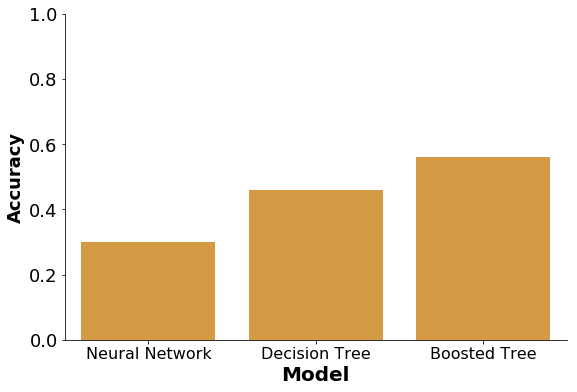

In [9]:
plt.figure(figsize=(9,6))
sns.despine()
ax = sns.barplot(x=model, y=accuracy,color='#eca02c')

# plt.title('Accuracy Score', fontsize=20, fontweight='bold')

plt.xlabel('Model', fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)

plt.ylabel('Accuracy', fontsize=18, fontweight='bold')
plt.yticks(fontsize=18)
plt.ylim([0,1.0])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.savefig('accuracy_score.jpg', transparent=True)

In [0]:
files.download('accuracy_score.jpg')

In [0]:
hotel_cluster = ['59','5','48','41','42','98','91','70','65','64']
precision = [0.51,0.46,0.37,0.37,0.37,0.42,0.35,0.4,0.91,0.62]

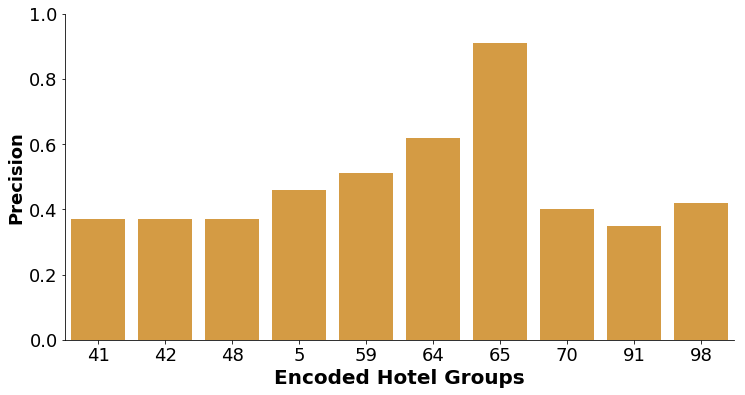

In [6]:
plt.figure(figsize=(12,6))
sns.despine()
ax = sns.barplot(x=hotel_cluster, y=precision,color='#eca02c')

# plt.title('Accuracy Score', fontsize=20, fontweight='bold')

plt.xlabel('Encoded Hotel Groups', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18)

plt.ylabel('Precision', fontsize=18, fontweight='bold')
plt.yticks(fontsize=18)
plt.ylim([0,1.0])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.savefig('decisiontree_precision.jpg', transparent=True)

In [0]:
files.download('decisiontree_precision.jpg')